In [1]:
import torch
from torch import nn
from d2l import torch as d2l


In [2]:
n_train,n_test,num_inputs,batch_size=20,100,200,5
true_w,true_b,=torch.ones(num_inputs,1)*0.01,0.05
train_data=d2l.synthetic_data(true_w,true_b,n_train)
train_iter=d2l.load_array(train_data,batch_size)
test_data=d2l.synthetic_data(true_w,true_b,n_test)
test_iter=d2l.load_array(test_data,batch_size)



In [7]:
def init_params():
    w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b=torch.zeros(1,requires_grad=True)
    return [w,b]


In [11]:
def l2_penalty(w):
    return torch.sum(w.pow(2))/2


In [14]:
def train(lambd):
    w,b=init_params()
    net,loss=lambda x:d2l.linreg(x,w,b),d2l.squared_loss#使用的lamda 匿名函数 相当于 def net（x）: return d2l.linreg(x,w,b)
    num_epochs,lr=100,0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for x,y in train_iter:
            l=loss(net(x),y)+lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if(epoch+1)%5==0:
            animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    # torch.norm(w) 表示计算张量 w 的范数，它的输出是一个标量张量(tensor类型)。.item() 是将这个标量张量转换为 Python 中的标量（即一个数字)
    print('w的l2范数是：', torch.norm(w).item())


w的l2范数是： 12.797212600708008


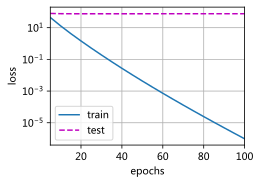

In [15]:
train(lambd=0)

w的l2范数是： 0.3702402114868164


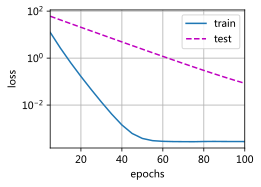

In [16]:
train(lambd=3)

# 权重衰减的简洁实现

In [19]:
def train_concise(wd):
    net=nn.Sequential(nn.Linear(num_inputs,1))#1.定义网络模型
    for param in net.parameters():#2.取出模型中每一层的参数
        param.data.normal_()#param 是一个张量，它不仅包括数值，还包括梯度和其他一些属性。param.data 只包含数值，它是一个张量（tensor），用于存储参数的数值。
    loss=nn.MSELoss(reduction='none')#3.定义损失函数
    num_epochs,lr=100,0.03#定义迭代次数和学习率
    trainer = torch.optim.SGD([{'params': net[0].weight, 'weight_decay':wd},{'params': net[0].bias}], lr=lr)
    animator=d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for x,y in train_iter:
            train_iter.zero_grad()
            l=loss(net(x),y)
            l.mean().backward()
            trainer.step()
            if(epoch+1)%5==0:
                animator.add(epoch + 1,
                             (d2l.evaluate_loss(net, train_iter, loss),
                              d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())




AttributeError: 'DataLoader' object has no attribute 'zero_grad'

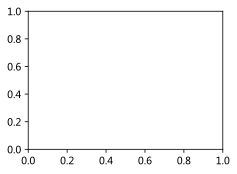

In [20]:
train_concise(3)